In [57]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# plt font size 20
plt.rcParams.update({'font.size': 16})

## Load data

In [3]:
files =  glob.glob("output/*.npy")

In [28]:
data = {}

In [31]:
for f in files:
    n = int(f.split("/")[1].split(".")[0].split("_")[0])
    rho = int(f.split("/")[1].split(".")[0].split("_")[1])
    if data.get((n, rho)) is None:
        data[(n, rho)] = np.load(f).flatten()
    else:
        data[(n, rho)] = np.concatenate((data[(n, rho)], np.load(f).flatten()))

## EV plots

In [51]:
avg = {k: np.mean(v) for k, v in data.items()}
stderrs = {k: 3 * np.std(v)/np.sqrt(len(v)) for k, v in data.items()}

Text(0.5, 1.0, 'average size of smallest Nash equilibrium vs. function of rho, for fixed n')

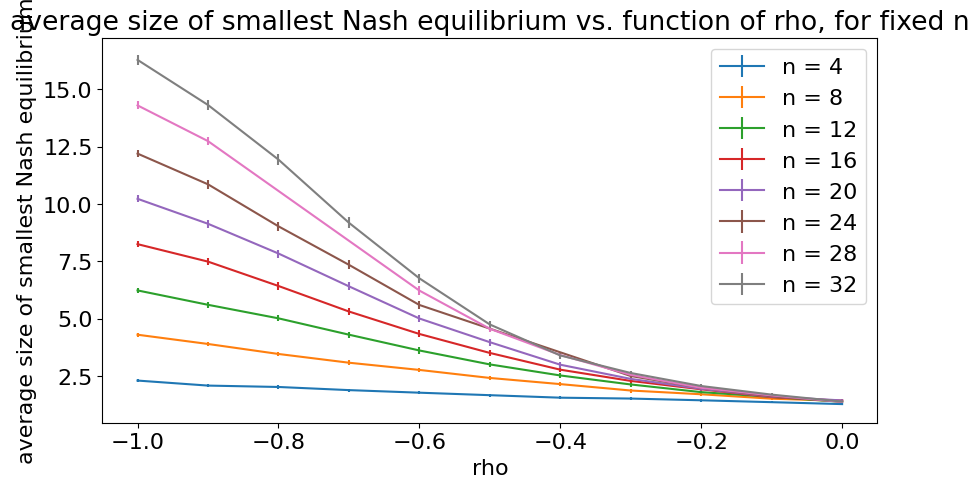

In [71]:
# plot by n

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for n in range(4, 36, 4):
    xs = []
    ys = []
    errs = []
    for rho in range(11):
        if (n, rho) in data. keys():
            xs.append(-0.1 * rho)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"n = {n}")

ax.legend()
ax.set_xlabel("rho")
ax.set_ylabel("average size of smallest Nash equilibrium")
ax.set_title("average size of smallest Nash equilibrium vs. function of rho, for fixed n")

Text(0, 0.5, 'smallest N.E.')

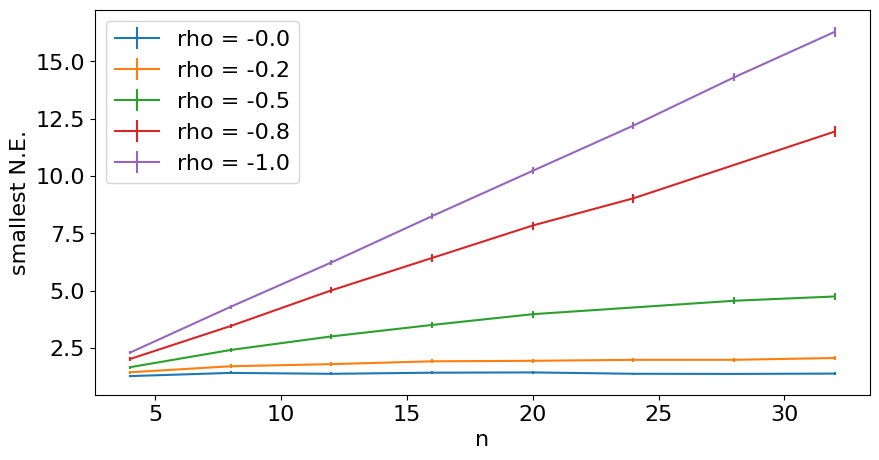

In [72]:
# plot by rho

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")

ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("smallest N.E.")
# ax.set_title("average size of smallest Nash equilibrium vs. function of rho, for fixed n")

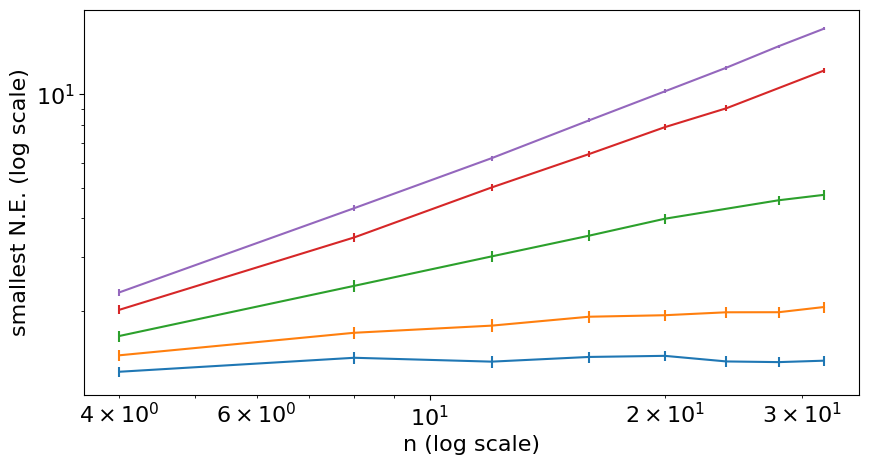

In [74]:
# plot by rho

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")

# ax.legend()
ax.set_xlabel("n (log scale)")
ax.set_ylabel("smallest N.E. (log scale)")
# ax.set_title("average size of smallest Nash equilibrium vs. function of rho, for fixed n")
ax.set_yscale("log")
ax.set_xscale("log")

Text(0, 0.5, 'smallest N.E.')

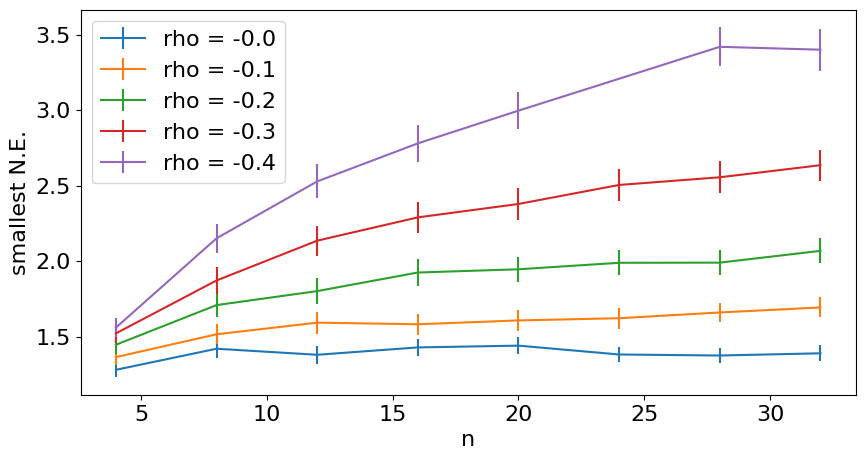

In [75]:
# plot by rho

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in range(5):
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")

ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("smallest N.E.")
# ax.set_title("average size of smallest Nash equilibrium vs. function of rho, for fixed n")

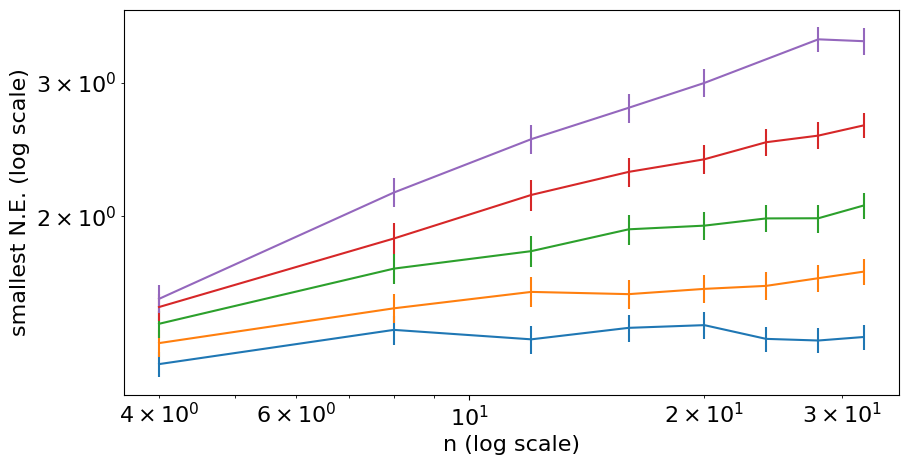

In [76]:
# plot by rho

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in range(5):
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")

# ax.legend()
ax.set_xlabel("n (log scale)")
ax.set_ylabel("smallest N.E. (log scale)")
# ax.set_title("average size of smallest Nash equilibrium vs. function of rho, for fixed n")
ax.set_yscale("log")
ax.set_xscale("log")

In [85]:
ms = []

for rho in range(11):
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(avg[(n, rho)])
            errs.append(stderrs[(n, rho)])
    xlog = np.log(np.array(xs))
    ylog = np.log(np.array(ys))
    m, b = np.polyfit( xlog, ylog, 1 )
    ms.append(m)
    fit_r_squared = 1 - (np.sum((ylog - (m * xlog + b)) ** 2) / np.sum((ylog - np.mean(ylog)) ** 2))
    if b > 0:
        print(f"{-0.1 * rho:.1f} & ${m:.3f} \\log n + {b:.3f}$ & {fit_r_squared:.3f} \\\\ \\hline")
    else:
        print(f"{-0.1 * rho:.1f} & ${m:.3f} \\log n {b:.3f}$ & {fit_r_squared:.3f} \\\\ \\hline")

-0.0 & $0.029 \log n + 0.248$ & 0.303 \\ \hline
-0.1 & $0.092 \log n + 0.205$ & 0.933 \\ \hline
-0.2 & $0.163 \log n + 0.173$ & 0.964 \\ \hline
-0.3 & $0.263 \log n + 0.076$ & 0.990 \\ \hline
-0.4 & $0.380 \log n -0.047$ & 0.989 \\ \hline
-0.5 & $0.511 \log n -0.180$ & 0.997 \\ \hline
-0.6 & $0.643 \log n -0.317$ & 1.000 \\ \hline
-0.7 & $0.766 \log n -0.443$ & 0.999 \\ \hline
-0.8 & $0.854 \log n -0.504$ & 0.999 \\ \hline
-0.9 & $0.930 \log n -0.567$ & 1.000 \\ \hline
-1.0 & $0.942 \log n -0.491$ & 1.000 \\ \hline


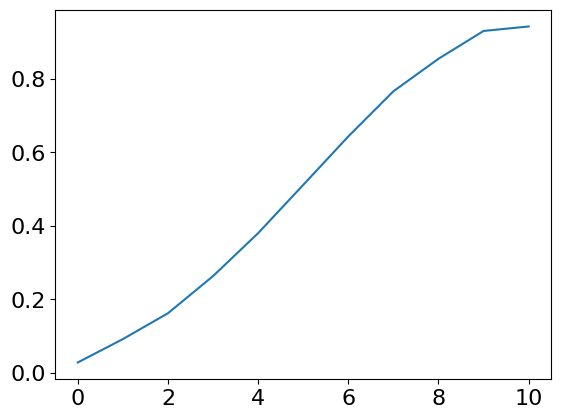

In [83]:
plt.plot(ms)

## PDF plots

In [87]:
pdfi = {}
stderri = {}
for i in range(1, 7):
    tmp = {k: v <= i for k, v in data.items()}
    pdfi[i] = {k: np.mean(v) for k, v in tmp.items()}
    stderri[i] = {k: 3 * np.std(v)/np.sqrt(len(v)) for k, v in tmp.items()}

Text(0, 0.5, 'probability of N.E. <= 1')

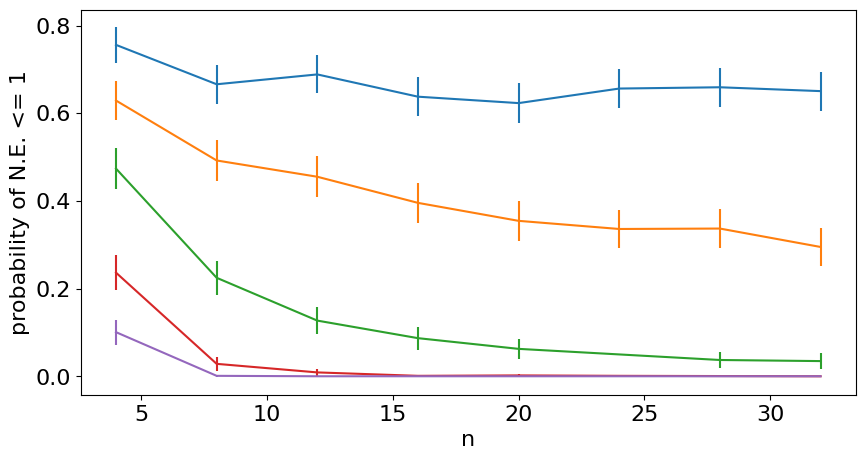

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[1][(n, rho)])
            errs.append(stderri[1][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
# ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("probability of N.E. <= 1")

Text(0, 0.5, 'probability of N.E. <= 2')

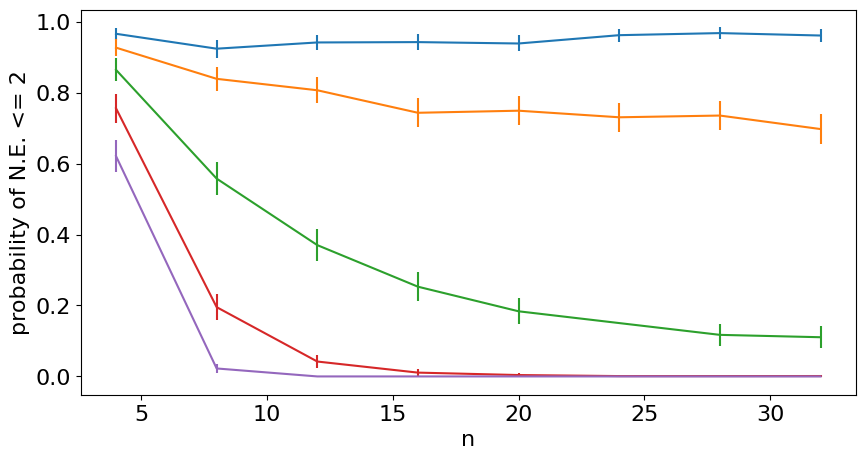

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[2][(n, rho)])
            errs.append(stderri[2][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
# ax.legend(loc="lower left")
ax.set_xlabel("n")
ax.set_ylabel("probability of N.E. <= 2")

Text(0, 0.5, 'probability of N.E. <= 3')

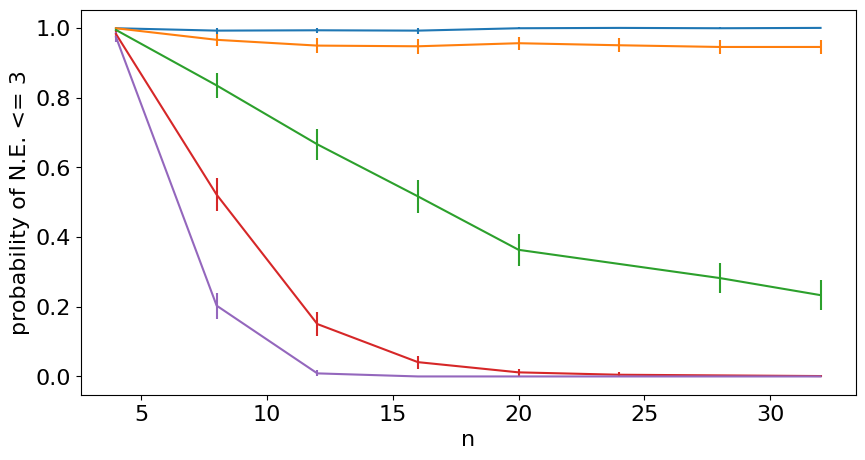

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[3][(n, rho)])
            errs.append(stderri[3][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
# ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("probability of N.E. <= 3")

Text(0, 0.5, 'probability of N.E. <= 4')

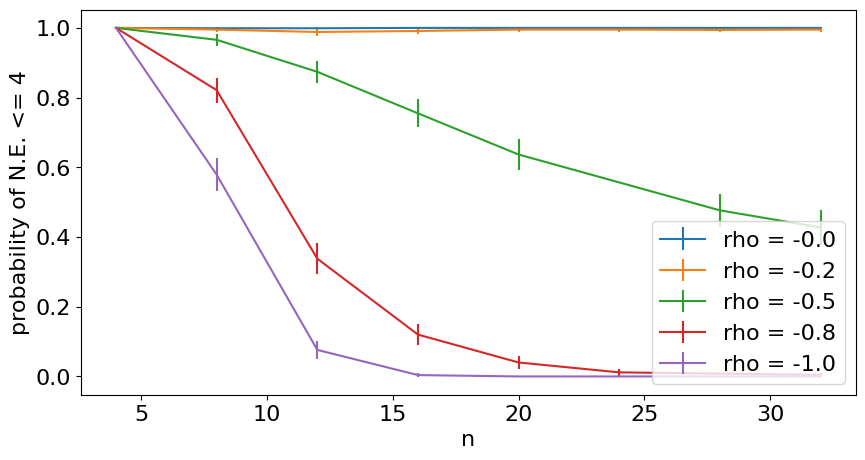

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[4][(n, rho)])
            errs.append(stderri[4][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend(loc="lower right")
ax.set_xlabel("n")
ax.set_ylabel("probability of N.E. <= 4")

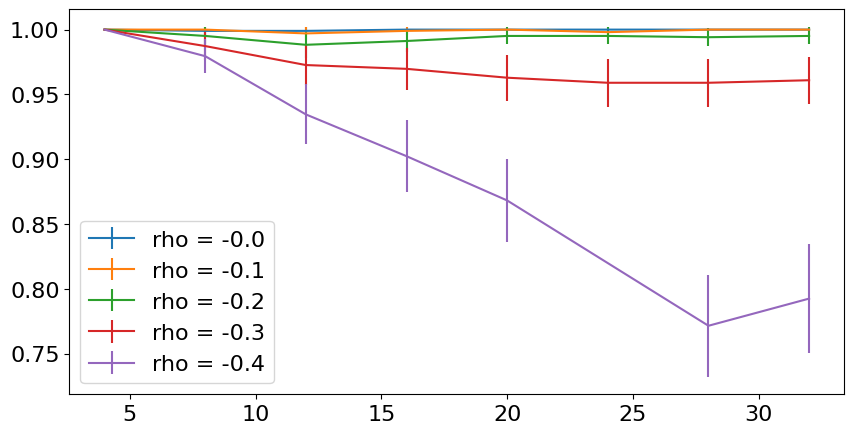

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 1, 2, 3, 4]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[4][(n, rho)])
            errs.append(stderri[4][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend()

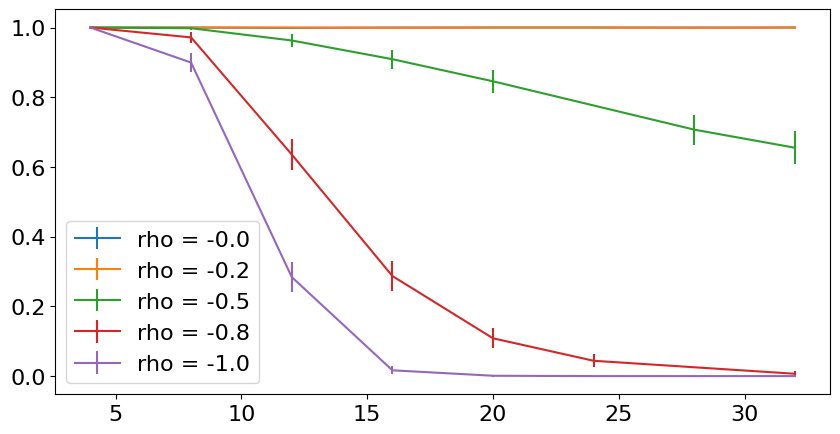

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[5][(n, rho)])
            errs.append(stderri[5][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend()

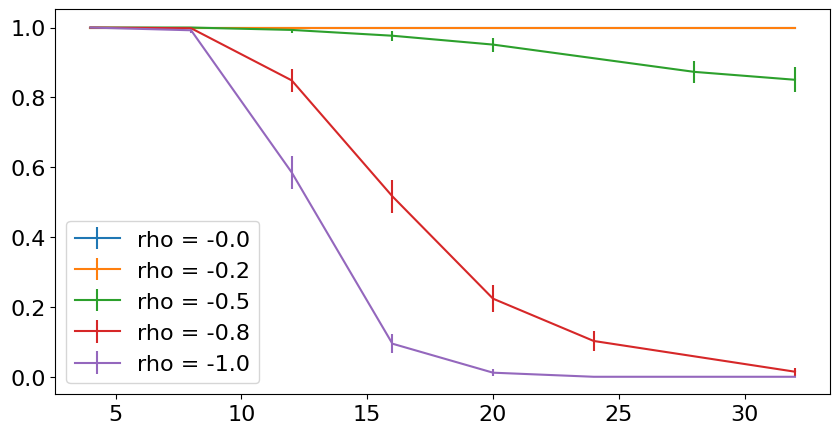

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 2, 5, 8, 10]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[6][(n, rho)])
            errs.append(stderri[6][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend()

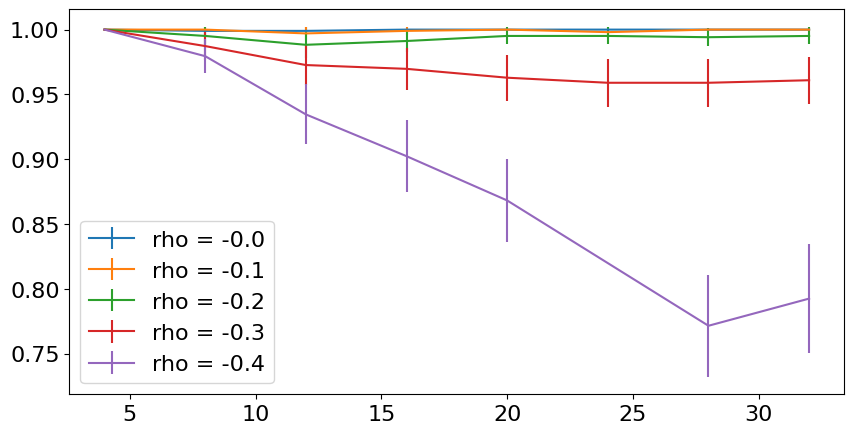

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 1, 2, 3, 4]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[4][(n, rho)])
            errs.append(stderri[4][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend()

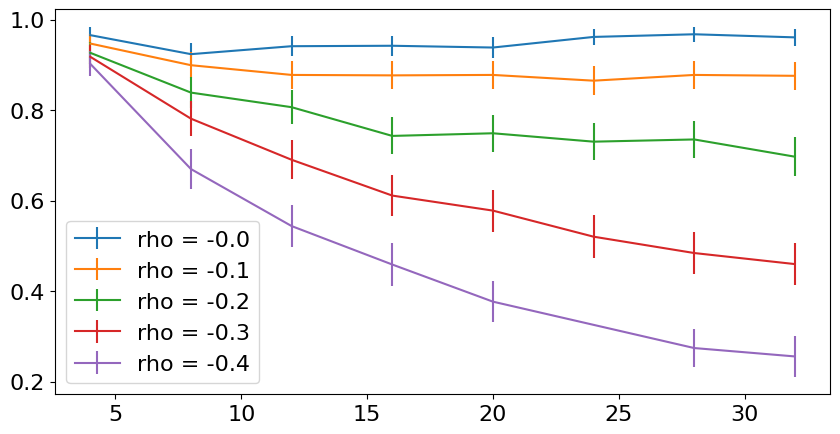

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for rho in [0, 1, 2, 3, 4]:
    xs = []
    ys = []
    errs = []
    for n in range(4, 36, 4):
        if (n, rho) in data. keys():
            xs.append(n)
            ys.append(pdfi[2][(n, rho)])
            errs.append(stderri[2][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"rho = {-0.1 * rho:.1f}")
    
ax.legend()

Text(0, 0.5, 'probability of N.E. <= 1')

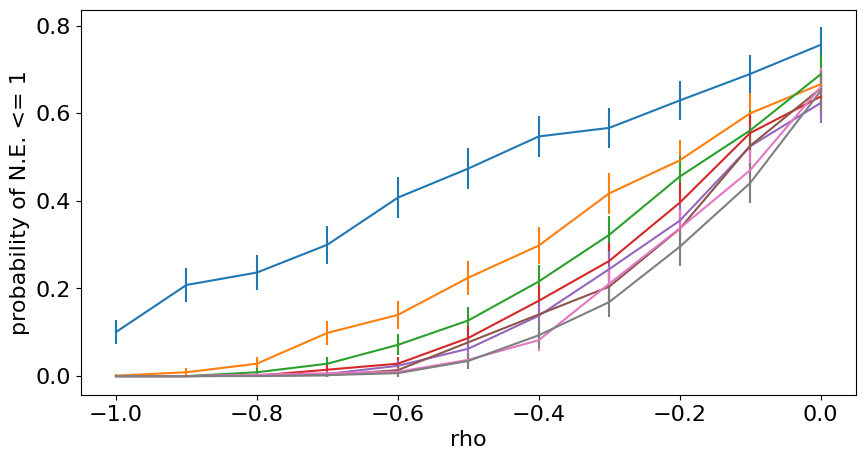

In [122]:
# plot by n

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for n in range(4, 36, 4):
    xs = []
    ys = []
    errs = []
    for rho in range(11):
        if (n, rho) in data. keys():
            xs.append(-0.1 * rho)
            ys.append(pdfi[1][(n, rho)])
            errs.append(stderri[1][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"n = {n}")

# ax.legend()
ax.set_xlabel("rho")
ax.set_ylabel("probability of N.E. <= 1")

Text(0, 0.5, 'probability of N.E. <= 2')

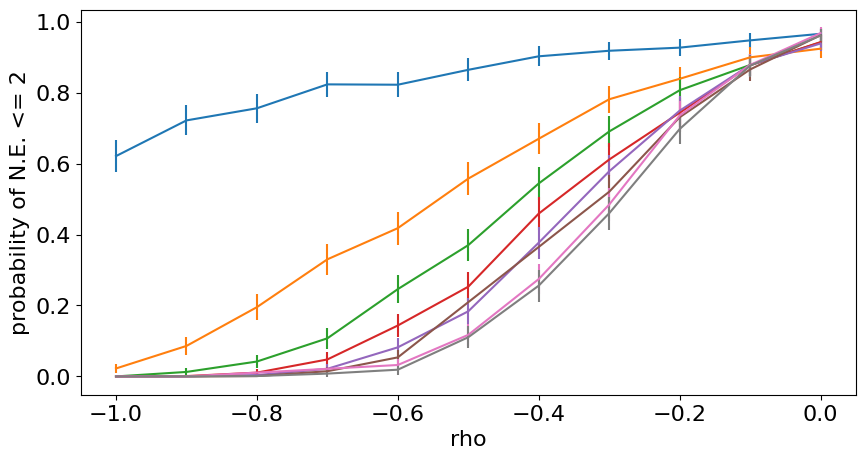

In [125]:
# plot by n

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for n in range(4, 36, 4):
    xs = []
    ys = []
    errs = []
    for rho in range(11):
        if (n, rho) in data. keys():
            xs.append(-0.1 * rho)
            ys.append(pdfi[2][(n, rho)])
            errs.append(stderri[2][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"n = {n}")

# ax.legend()
ax.set_xlabel("rho")
ax.set_ylabel("probability of N.E. <= 2")

Text(0, 0.5, 'probability of N.E. <= 3')

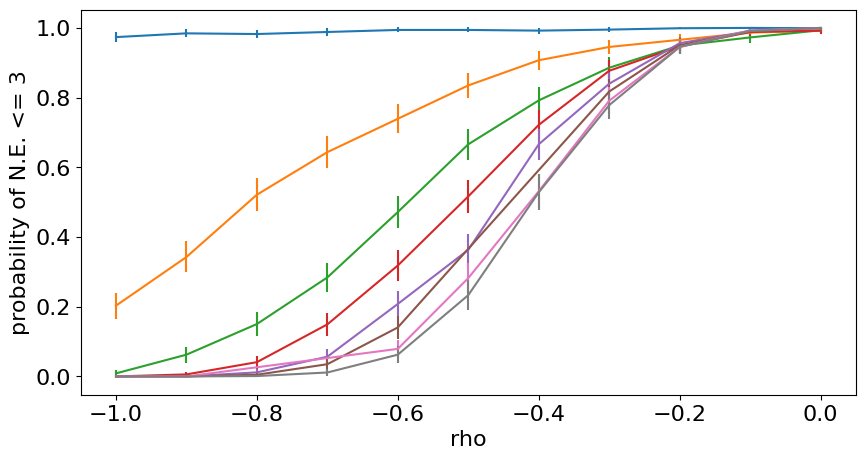

In [123]:
# plot by n

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for n in range(4, 36, 4):
    xs = []
    ys = []
    errs = []
    for rho in range(11):
        if (n, rho) in data. keys():
            xs.append(-0.1 * rho)
            ys.append(pdfi[3][(n, rho)])
            errs.append(stderri[3][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"n = {n}")

# ax.legend()
ax.set_xlabel("rho")
ax.set_ylabel("probability of N.E. <= 3")

Text(0, 0.5, 'probability of N.E. <= 4')

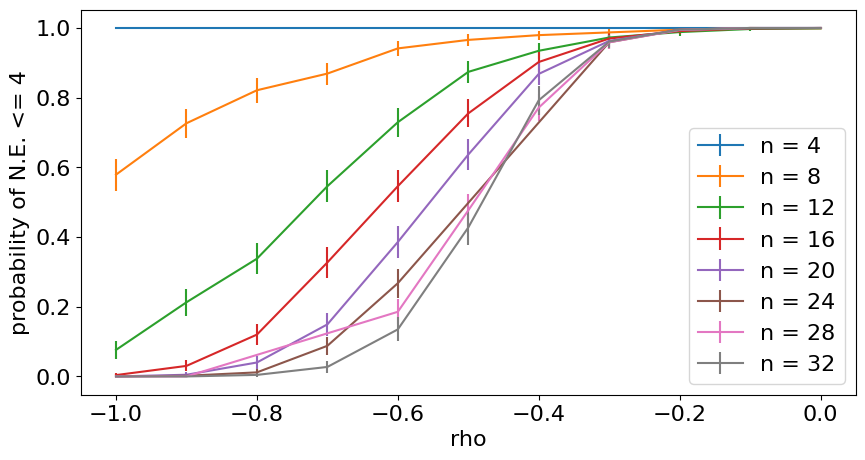

In [124]:
# plot by n

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for n in range(4, 36, 4):
    xs = []
    ys = []
    errs = []
    for rho in range(11):
        if (n, rho) in data. keys():
            xs.append(-0.1 * rho)
            ys.append(pdfi[4][(n, rho)])
            errs.append(stderri[4][(n, rho)])
    ax.errorbar(xs, ys, errs, label=f"n = {n}")

ax.legend()
ax.set_xlabel("rho")
ax.set_ylabel("probability of N.E. <= 4")